In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\oscar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('HR_data.csv')

In [3]:
#nan_counts = data.isna().sum()

#print(nan_counts)

In [4]:
data = data.dropna()

In [5]:
len(data.columns)

68

In [6]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [7]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()


In [9]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [12]:
subset = data[['Frustrated', 'Cohort',
       'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined']]

In [13]:
subset

,Frustrated,Cohort,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,2.0,D1_4,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,3.0,D1_4,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2.0,D1_4,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,2.0,D1_4,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,2.0,D1_4,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307,7.0,D1_5,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
308,2.0,D1_5,2.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,3.0,4.0
309,2.0,D1_5,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,4.0
310,3.0,D1_5,2.0,1.0,3.0,1.0,3.0,1.0,4.0,1.0,4.0,4.0


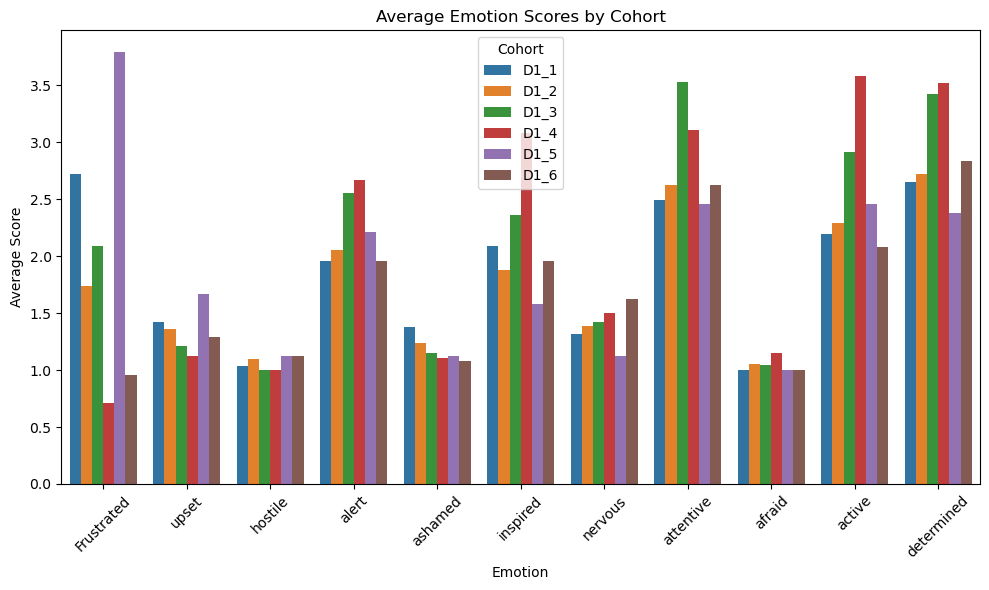

In [15]:
# Calculate the mean of each emotion for each cohort
emotion_means = subset.groupby('Cohort').mean().reset_index()

# Melt the DataFrame to make it suitable for seaborn's barplot
melted_data = pd.melt(emotion_means, id_vars=["Cohort"], var_name="Emotion", value_name="Average Score")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Emotion', y='Average Score', hue='Cohort', data=melted_data)
plt.title('Average Emotion Scores by Cohort')
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Cohort')
plt.tight_layout()
plt.show()

In [22]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()


# Splitting the dataset into biological and emotional data
bio_signals = data[['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']]
emotions = data[['Frustrated',
       'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined']]


# This is the code for the biplot

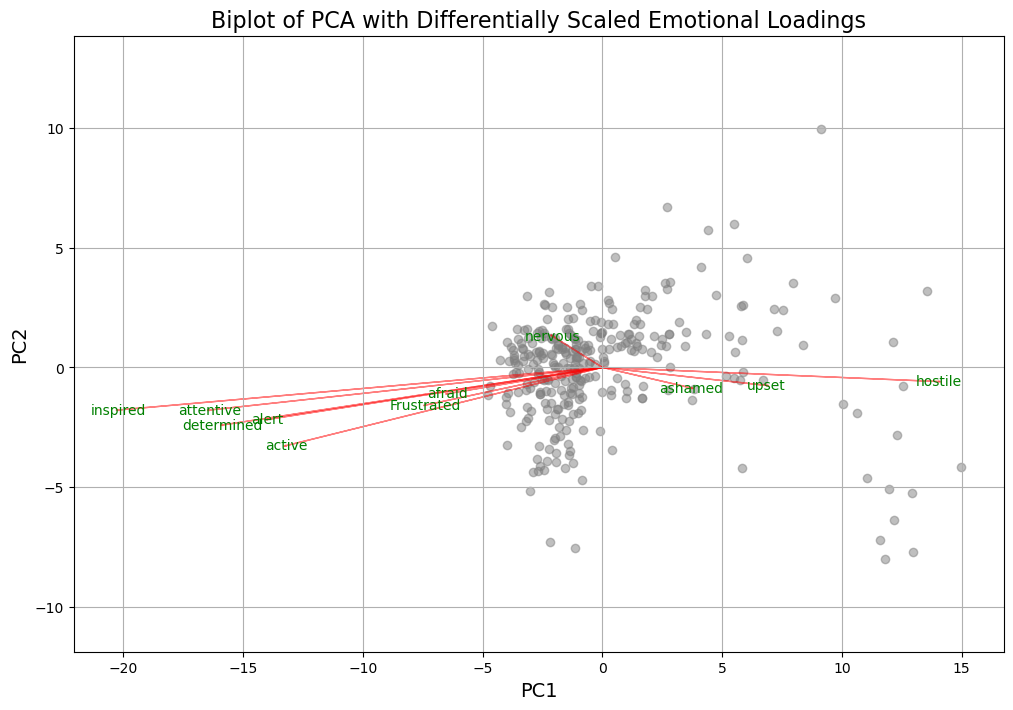

array([[-0.24578471,  0.22849379,  0.46776885, -0.46615797,  0.12363448,
        -0.67375546, -0.06937588, -0.5469028 , -0.21510278, -0.44029329,
        -0.52849905],
       [-0.26192768, -0.12548065, -0.09845005, -0.36236712, -0.14291595,
        -0.29641778,  0.21783196, -0.29674264, -0.18262337, -0.54463816,
        -0.40045581]])

In [3]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()

# Splitting the dataset into biological and emotional data
bio_signals = data[['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']]
emotions = data[['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined']]

# Standardizing the biological signals
bio_scaler = StandardScaler()
bio_scaled = bio_scaler.fit_transform(bio_signals)

# Standardizing the emotional data separately
emotion_scaler = StandardScaler()
emotions_scaled = emotion_scaler.fit_transform(emotions)

# Perform PCA
pca = PCA(n_components=2)
bio_pca_results = pca.fit_transform(bio_scaled)

# Calculate correlation coefficients between PCA components and each emotion
correlations = np.dot(bio_pca_results.T, emotions_scaled) / bio_scaled.shape[0]


def biplot(score, loadings, labels=None, scale_factors=(10, 5), figsize=(12, 8)):
    plt.figure(figsize=figsize)
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, color='grey', alpha=0.5)  # Plot PCA scores

    # Apply different scaling factors for PC1 and PC2
    loadings_scaled = np.array([loadings[0, :] * scale_factors[0], loadings[1, :] * scale_factors[1]])

    for i in range(loadings_scaled.shape[1]):
        # Draw arrows from origin to the end of each scaled loading vector
        plt.arrow(0, 0, loadings_scaled[0, i], loadings_scaled[1, i], color='red', alpha=0.5, head_width=0.05, head_length=0.1)
        if labels is not None:
            plt.text(loadings_scaled[0, i], loadings_scaled[1, i], labels[i], color='green', ha='center', va='center', fontsize=10)

    plt.xlabel('PC1', fontsize=14)
    plt.ylabel('PC2', fontsize=14)
    plt.title('Biplot of PCA with Differentially Scaled Emotional Loadings', fontsize=16)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example of calling the biplot function with differential scaling factors
biplot(bio_pca_results, correlations, labels=emotions.columns.tolist(), scale_factors=(30, 6), figsize=(12, 8))


correlations

In [ ]:
'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined'

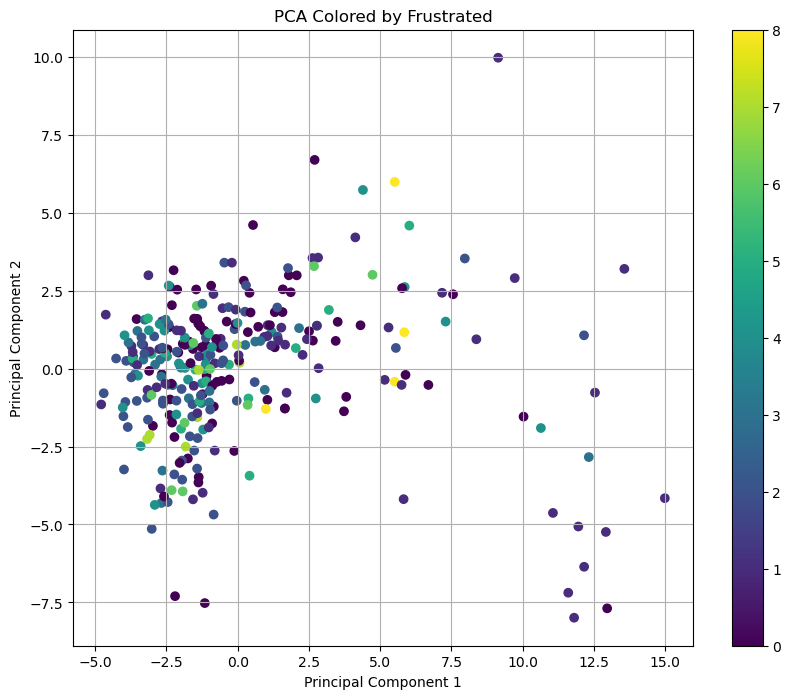

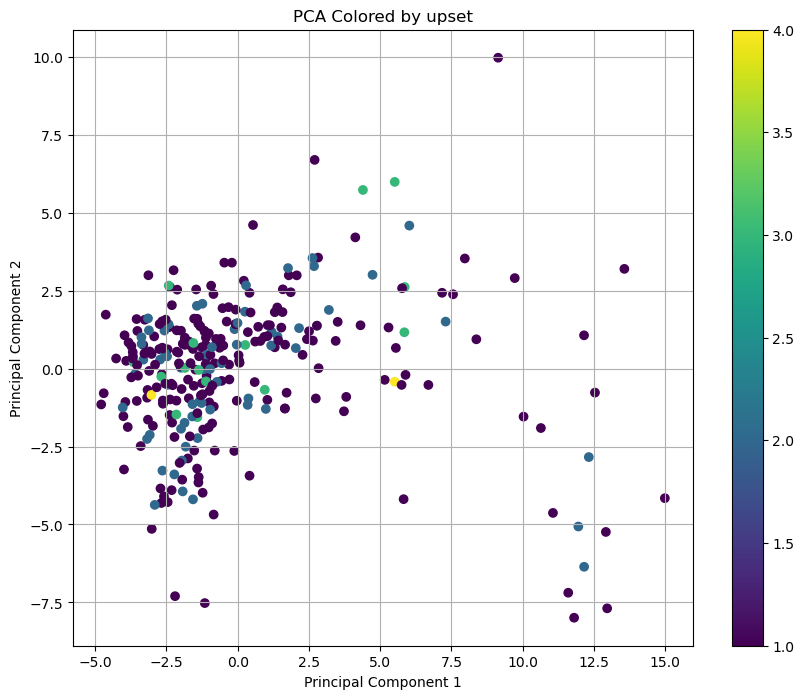

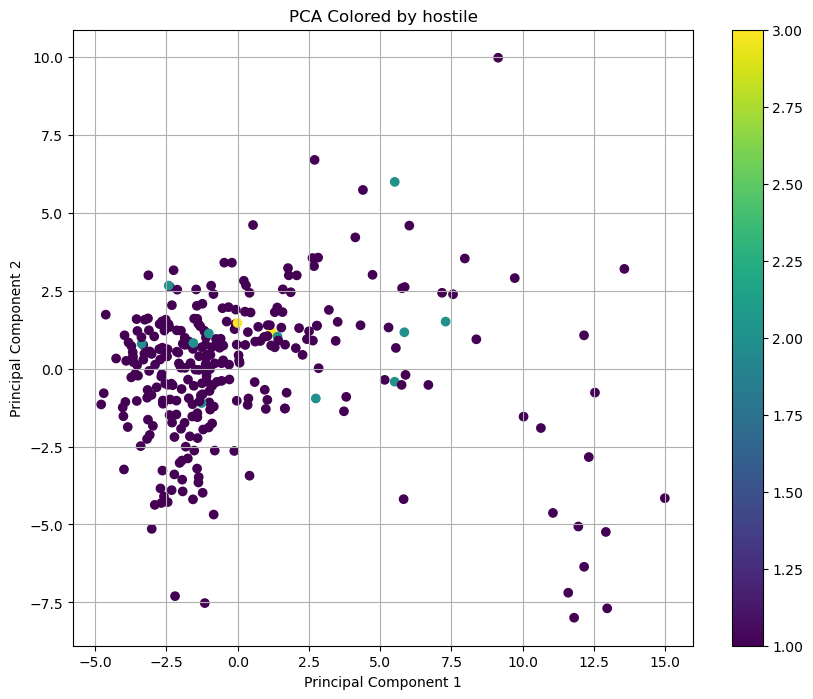

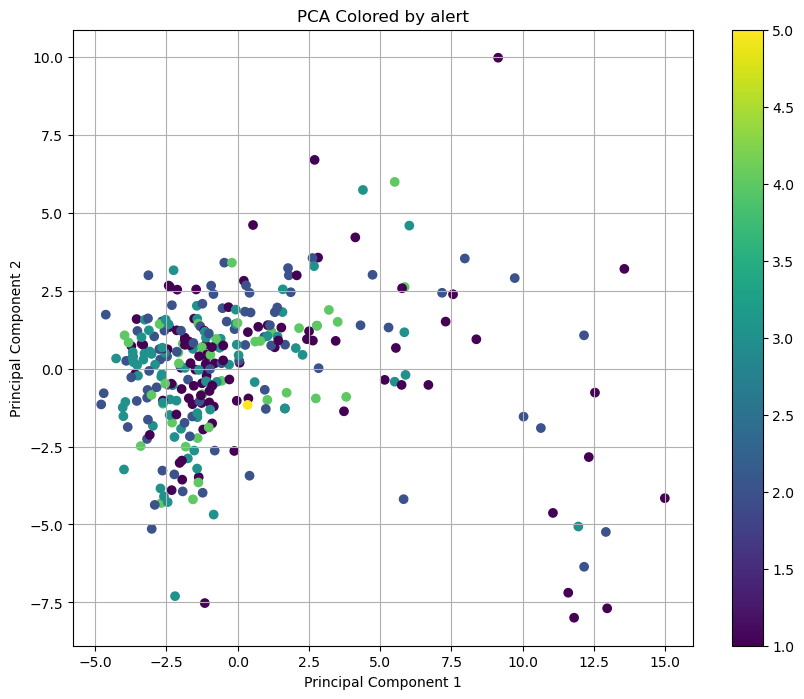

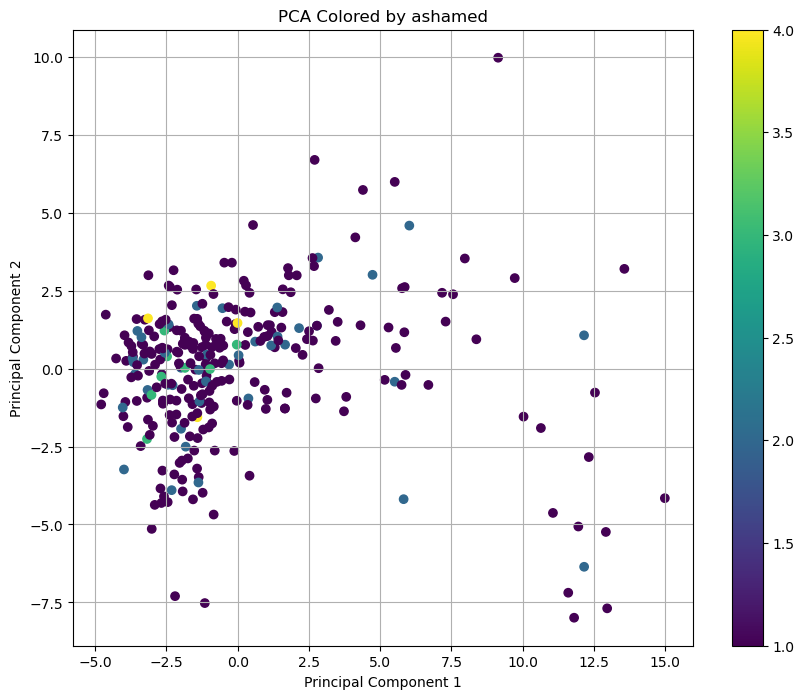

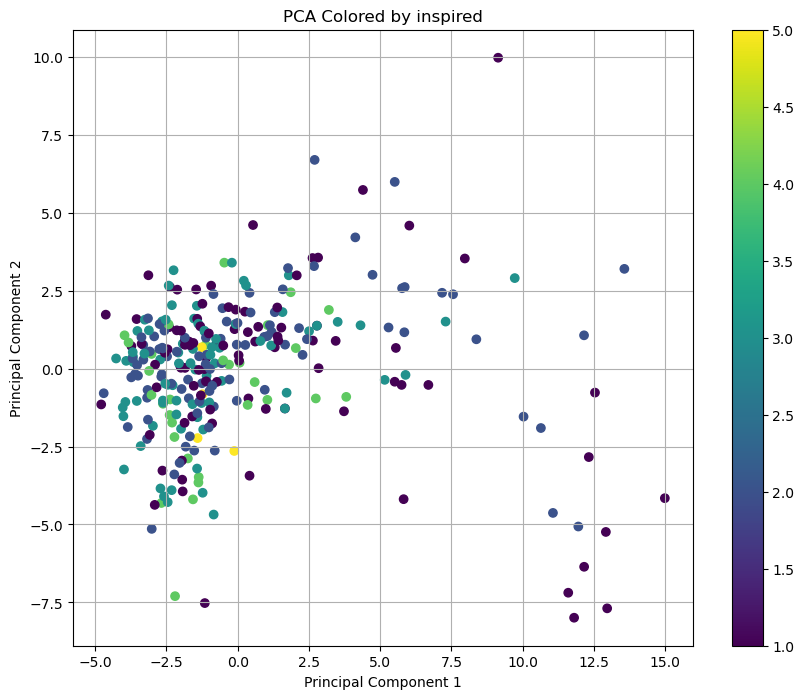

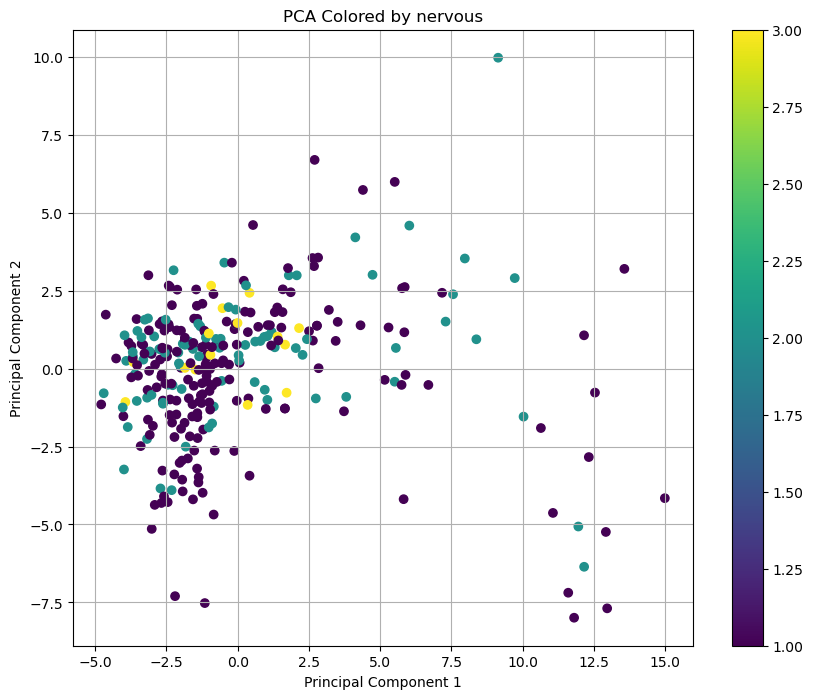

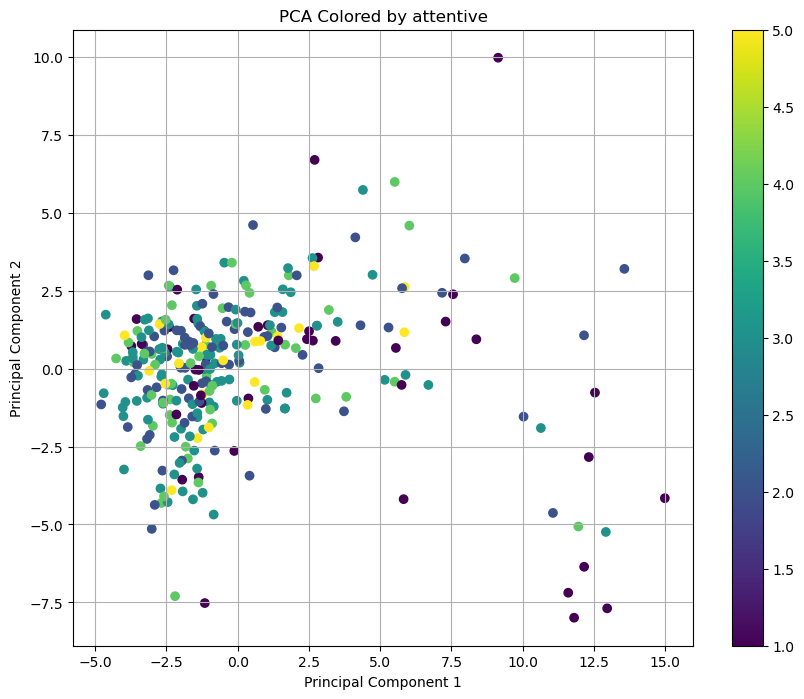

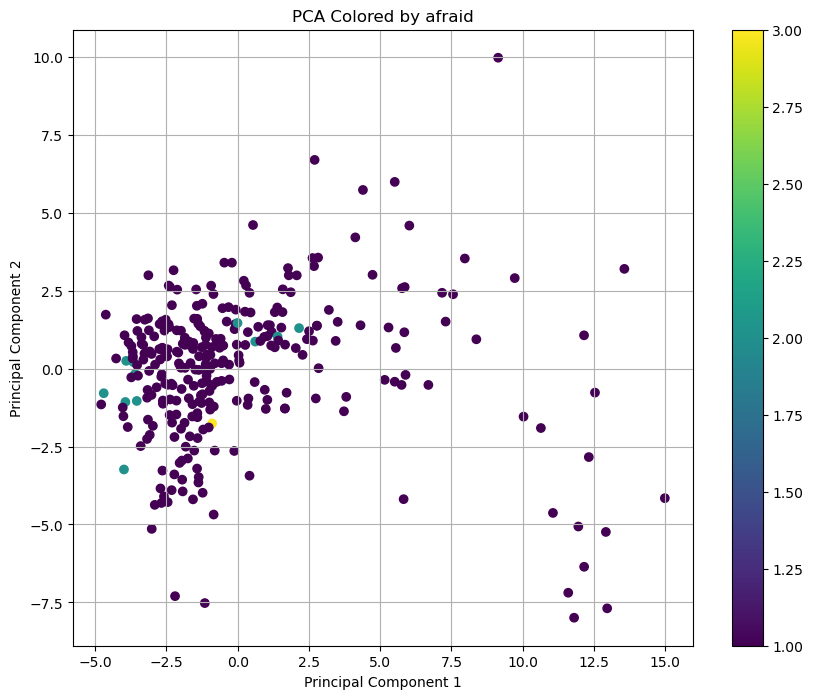

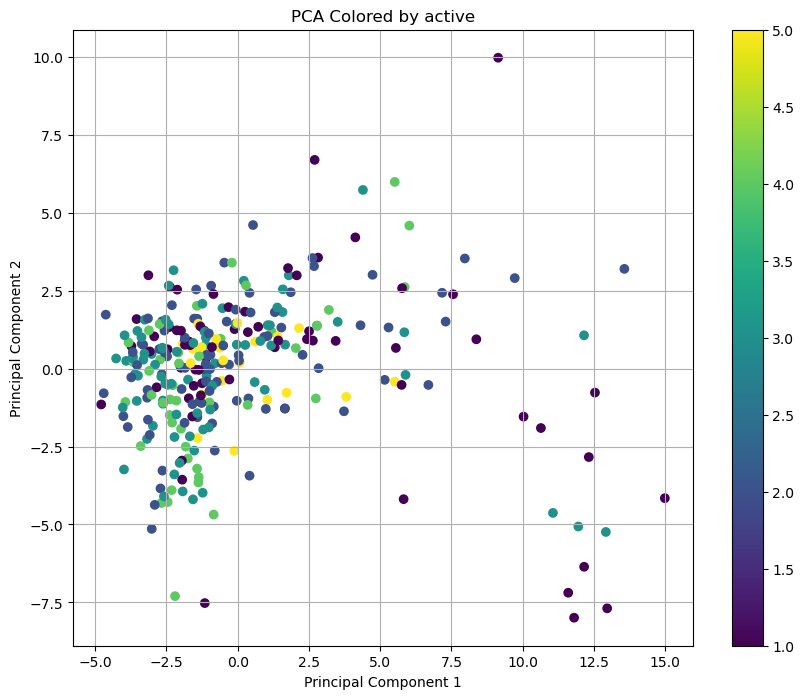

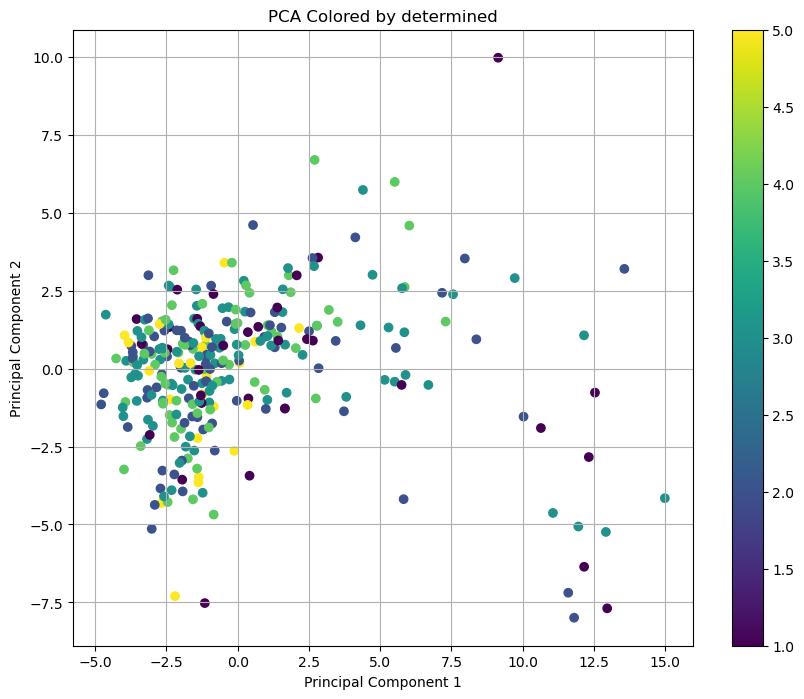

In [98]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()

# Columns to exclude from PCA
exclude_columns = [
    'Unnamed: 0', 'Round', 'Phase', 'Cohort', 'Puzzler', 'Individual'
]

# Columns that are emotional states
emotions = [
    'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 
    'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined'
]

# Select features excluding the specified columns and emotional states
features = data.drop(exclude_columns + emotions, axis=1)

# Standardize the remaining features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Adjust based on your analysis
principal_components = pca.fit_transform(features_scaled)

# Iterate over each emotion to create a PCA plot
for emotion in emotions:
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df[emotion] = data[emotion]  # Add emotion for coloring in the plot

    # Plotting PCA results color-coded by emotion
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df[emotion], cmap='viridis', label=emotion)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA Colored by {emotion}')
    plt.colorbar(scatter)
    plt.grid(True)
    plt.show()

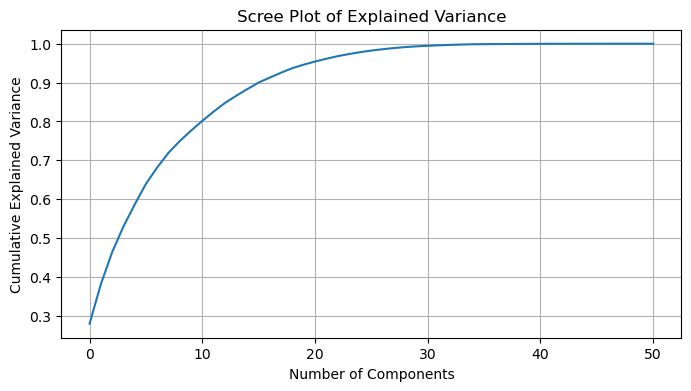

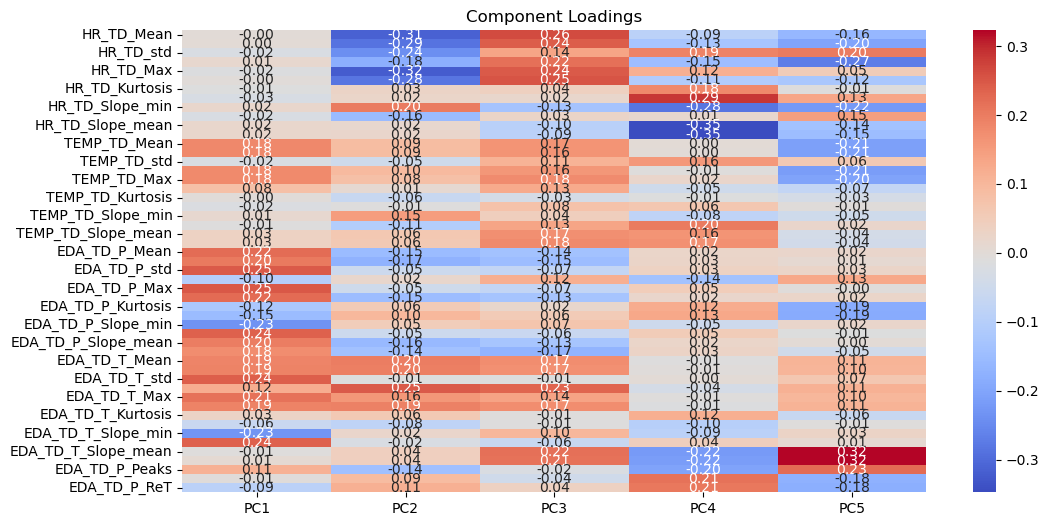

In [100]:
# Assuming 'features_scaled' has already been prepared and is ready for PCA
pca = PCA()
components = pca.fit_transform(features_scaled)

# Create a DataFrame with the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=features.columns)

# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot of Explained Variance')
plt.grid(True)
plt.show()

# Visualize the loadings for the first few components
plt.figure(figsize=(12, 6))
sns.heatmap(loadings.iloc[:, :5], cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Component Loadings')
plt.show()

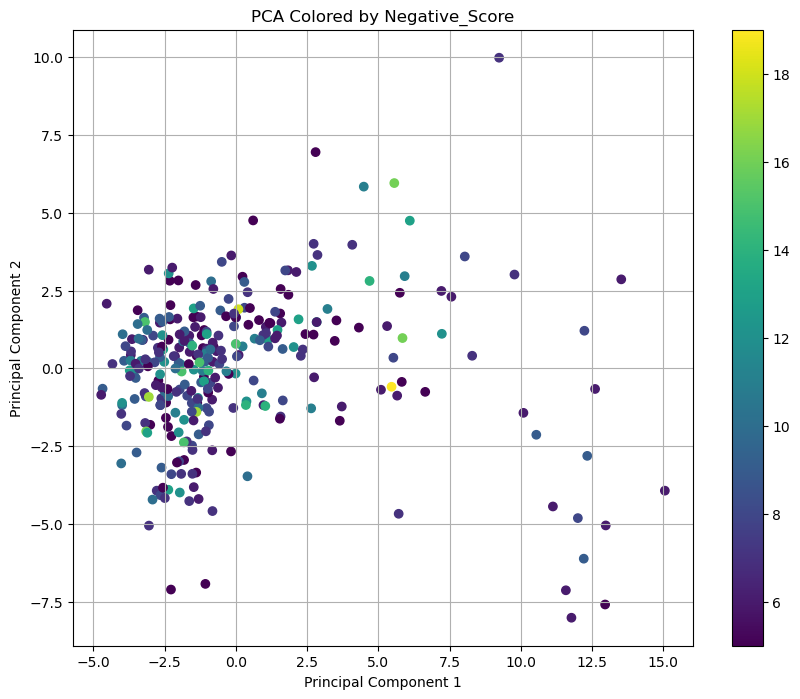

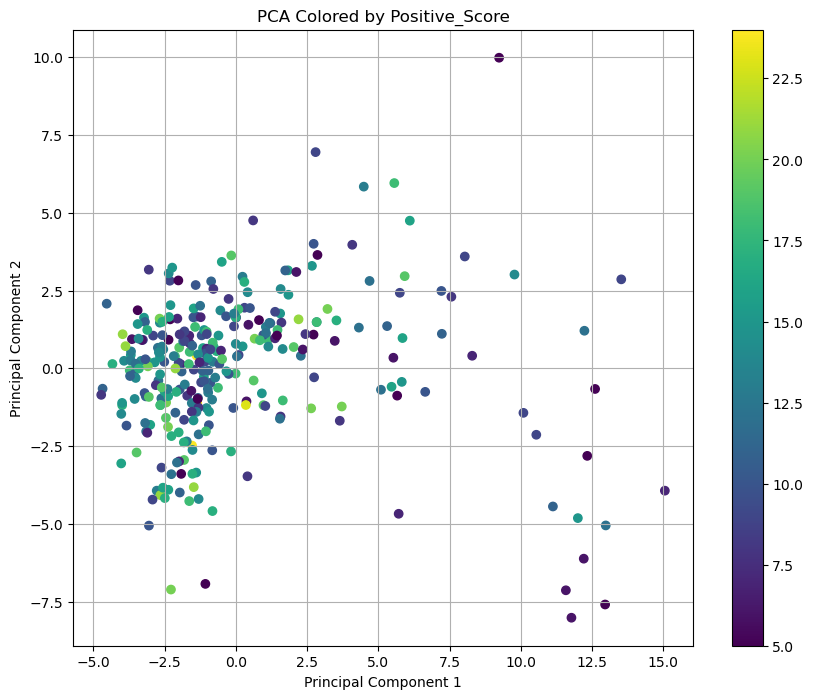

In [51]:

# Define the emotional groups
negative_emotions = ['afraid', 'ashamed', 'hostile', 'nervous', 'upset','Frustrated']
positive_emotions = ['active', 'alert', 'attentive', 'determined', 'inspired']

# Calculate the sum of scores for each group
data['Negative_Score'] = data[negative_emotions].sum(axis=1)
data['Positive_Score'] = data[positive_emotions].sum(axis=1)

# Columns to exclude from PCA include all individual emotion ratings
exclude_columns = [
    'Unnamed: 0', 'Round', 'Phase', 'Cohort', 'Puzzler', 'Individual'
] + negative_emotions + positive_emotions

# Select features excluding the specified columns
features = data.drop(exclude_columns, axis=1)

# Standardize the remaining features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Adjust based on your analysis
principal_components = pca.fit_transform(features_scaled)

# Create DataFrames for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Negative_Score'] = data['Negative_Score']
pca_df['Positive_Score'] = data['Positive_Score']

# Plotting PCA results, one for negative and one for positive scores
emotion_scores = ['Negative_Score', 'Positive_Score']
for score in emotion_scores:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df[score], cmap='viridis', label=score)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA Colored by {score}')
    plt.colorbar(scatter)
    plt.grid(True)
    plt.show()


scroll down to see for each phase

# No obvious patterns in the phases

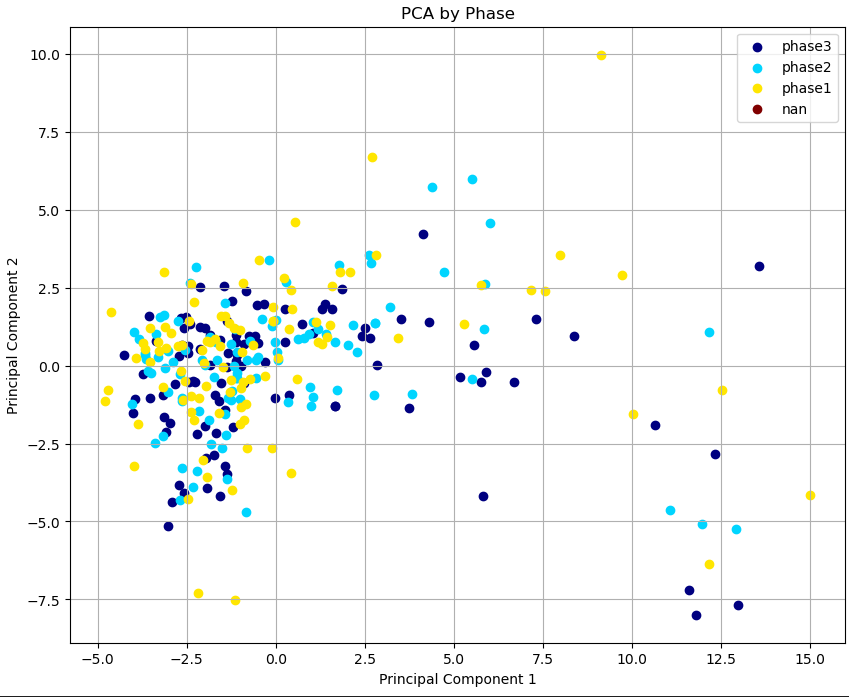

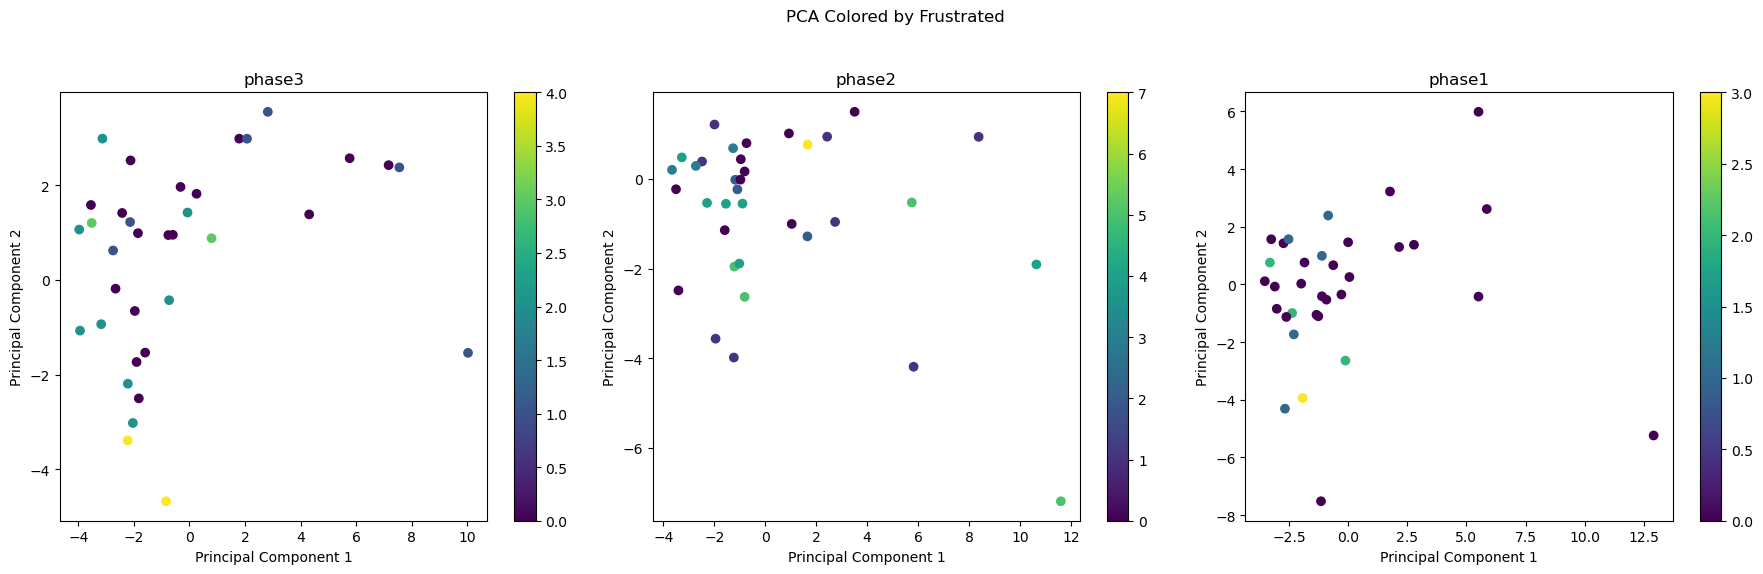

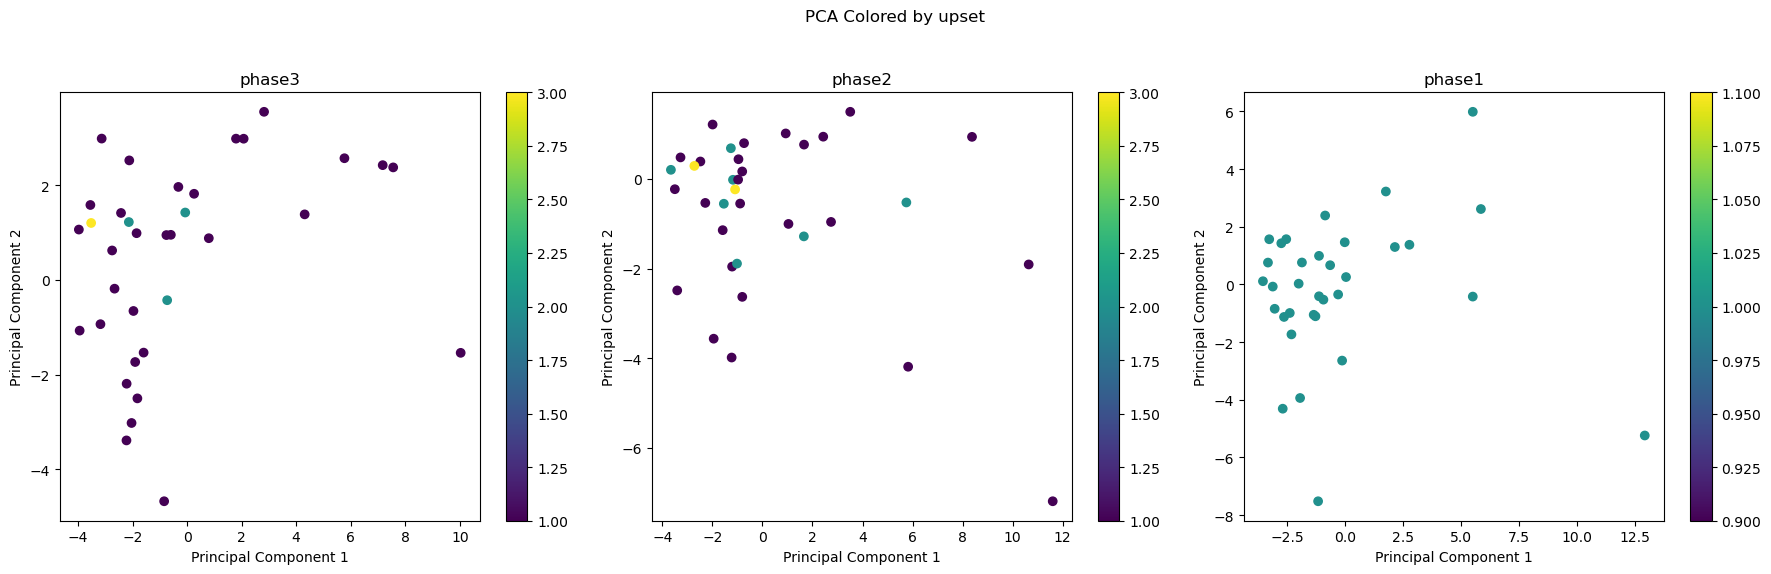

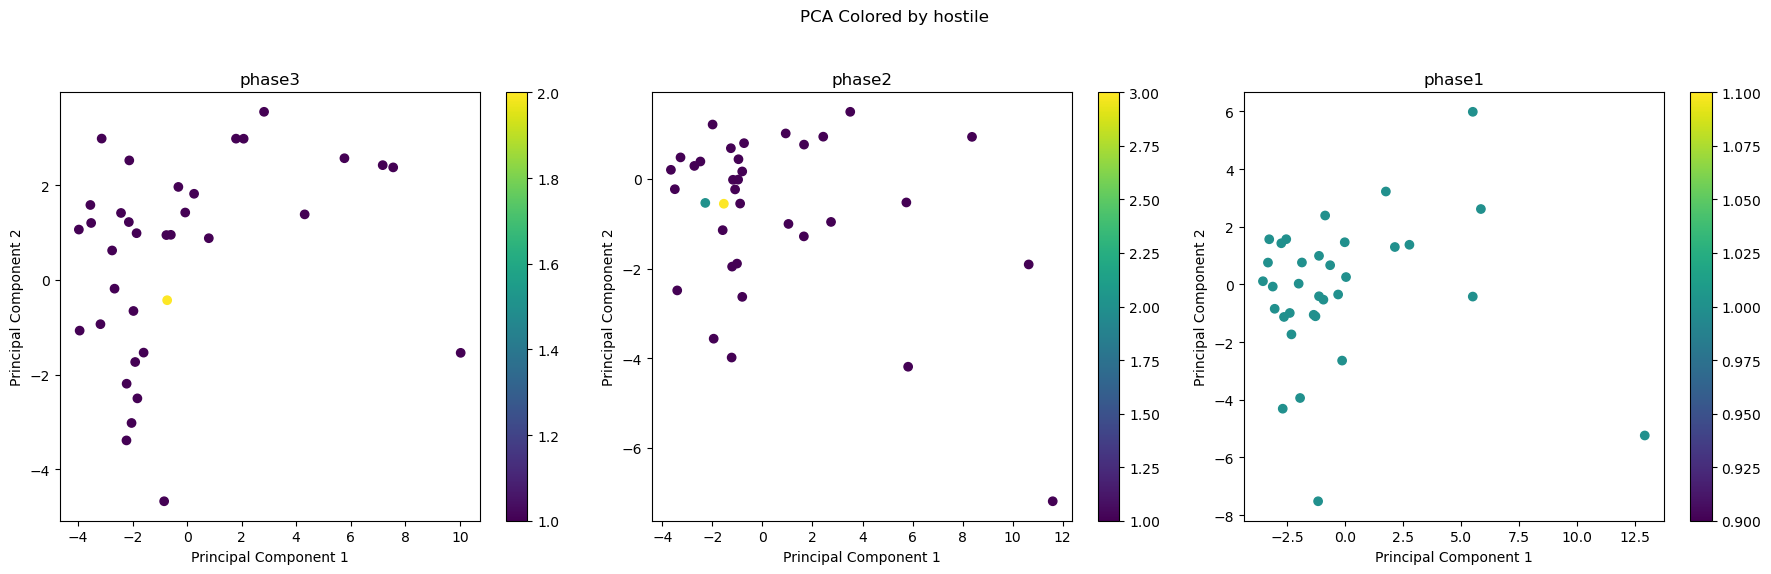

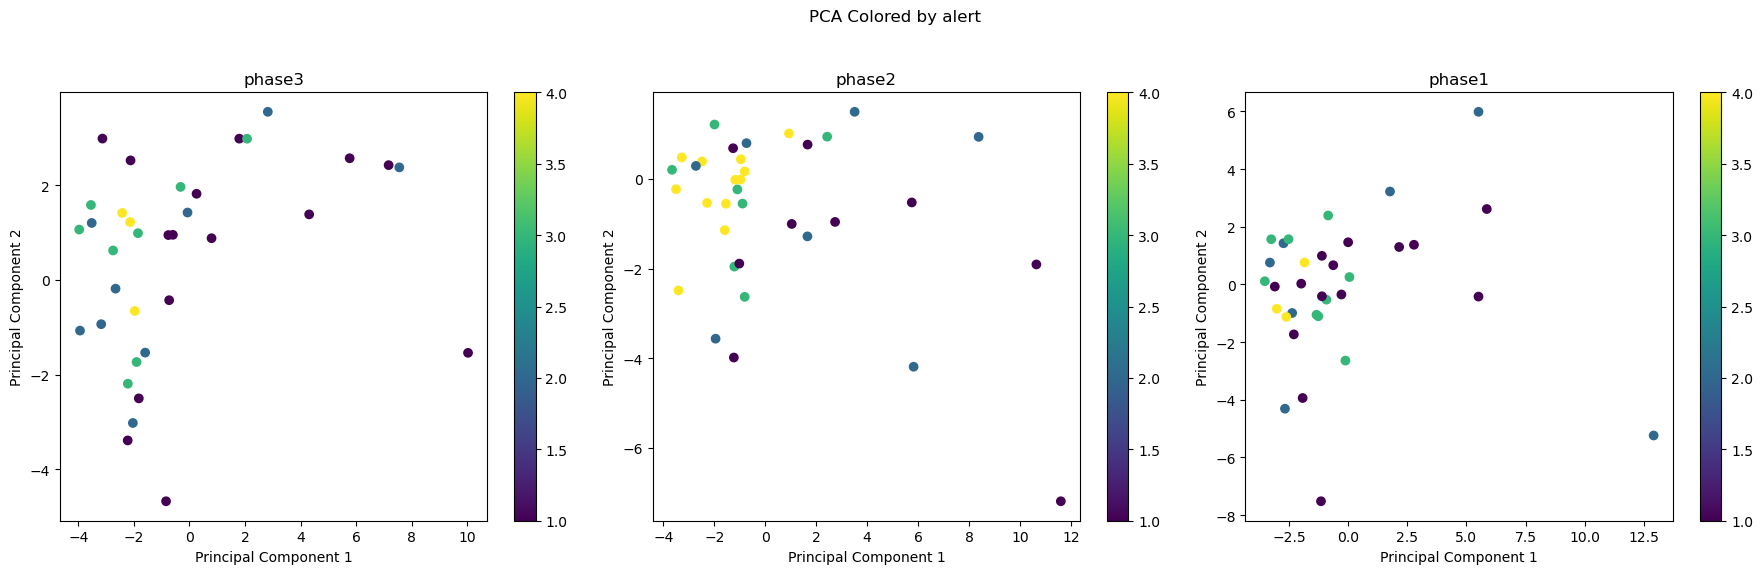

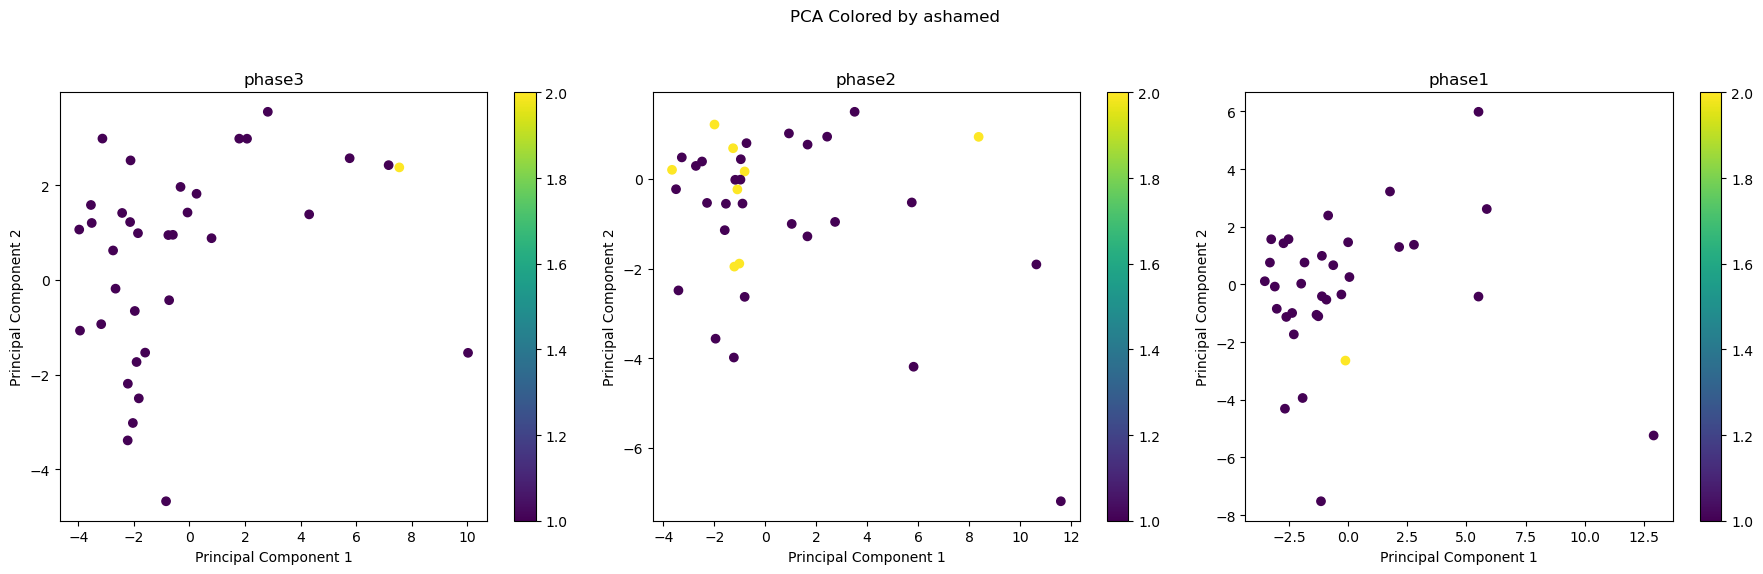

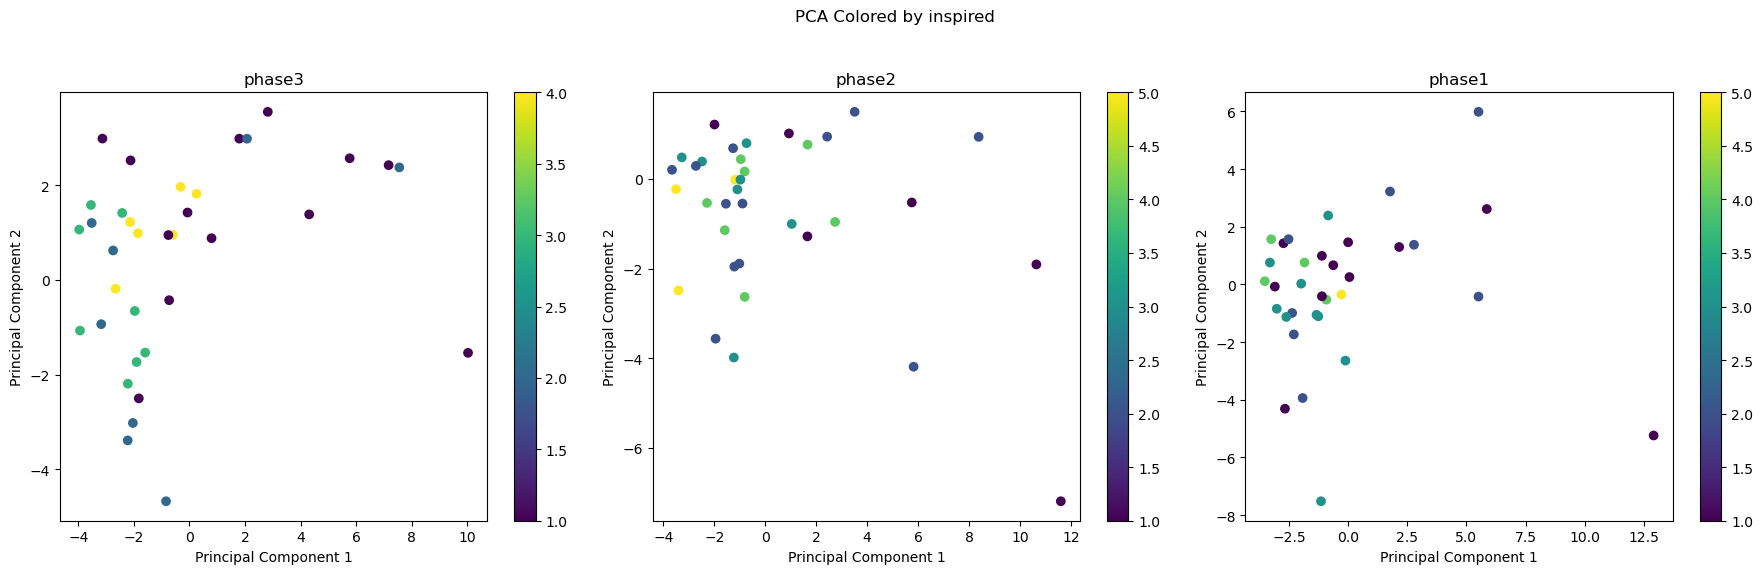

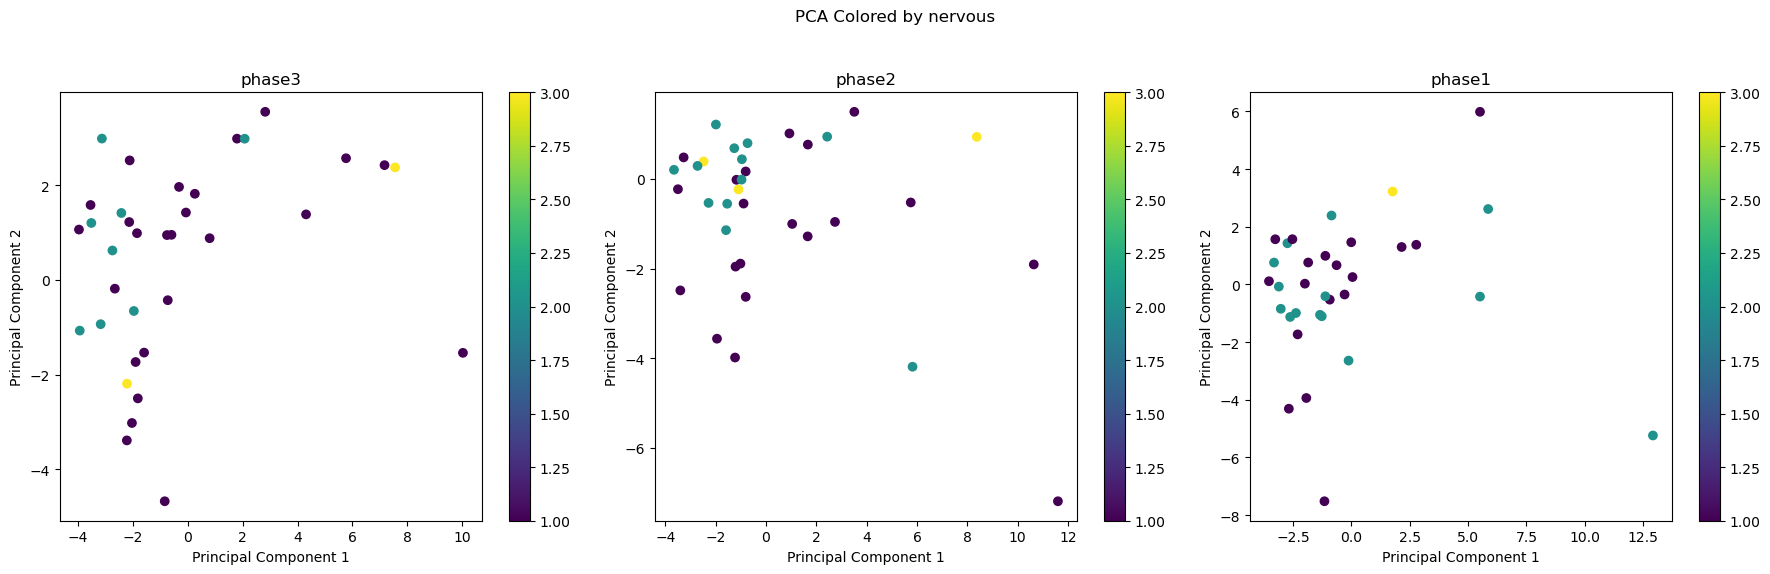

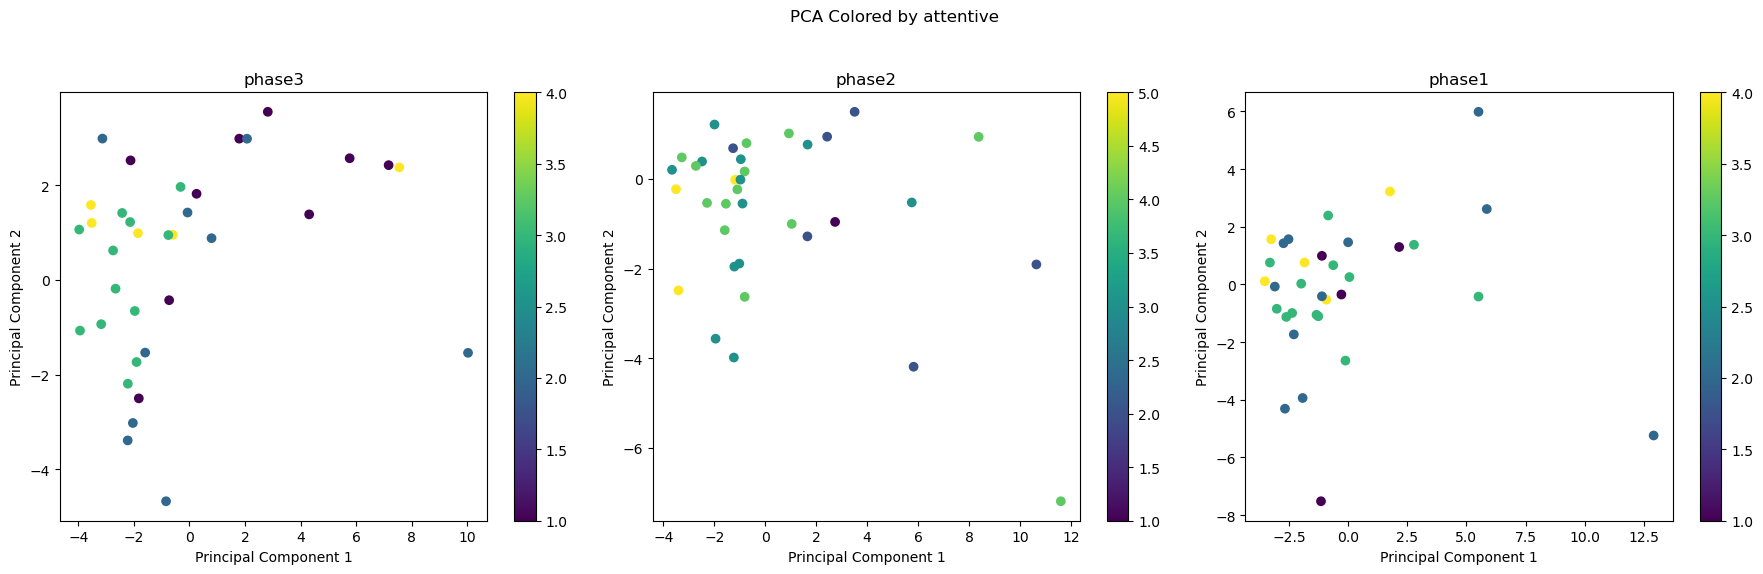

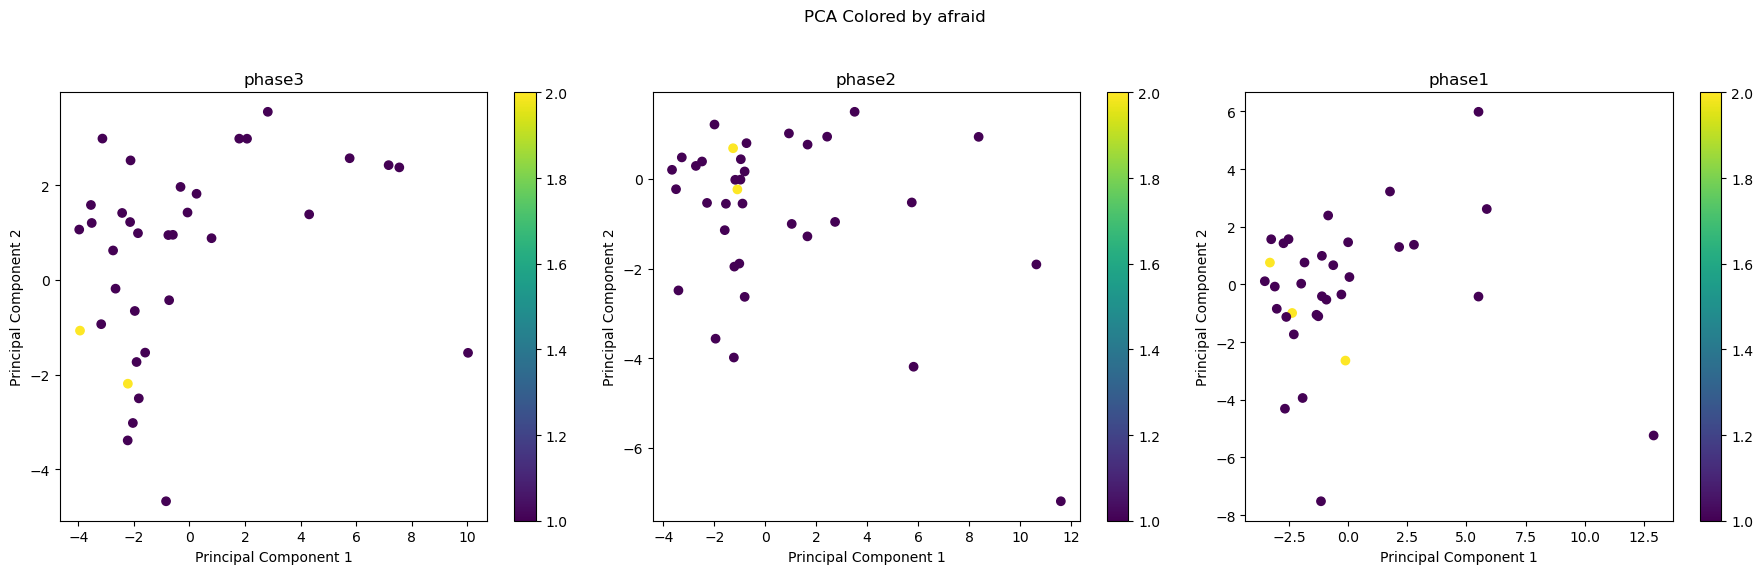

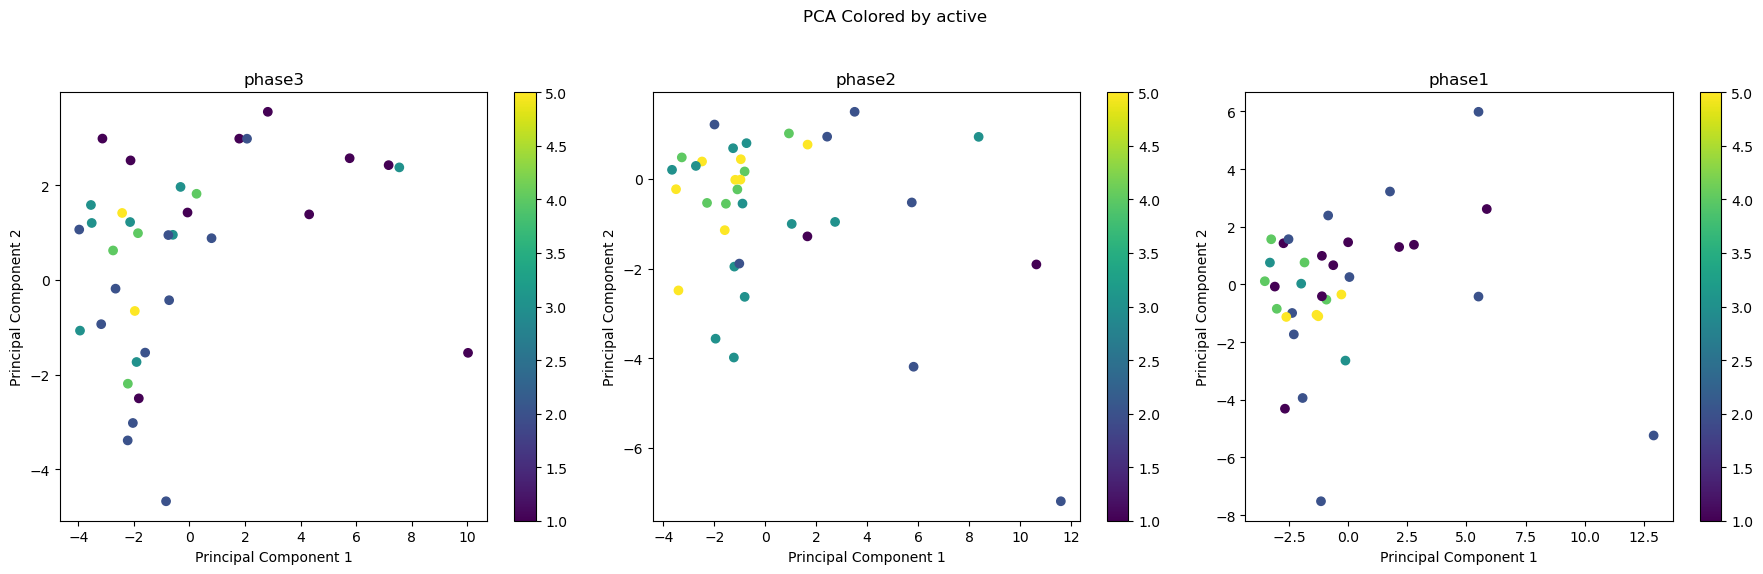

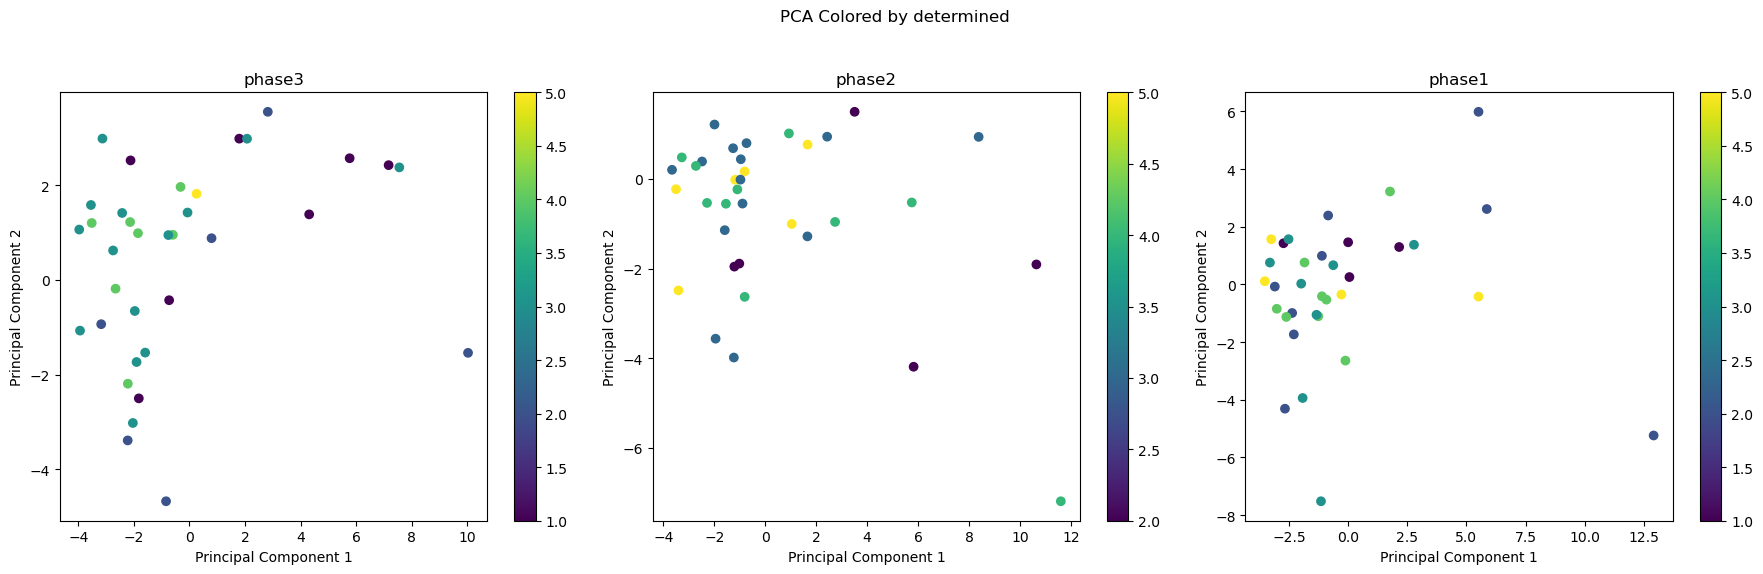

In [61]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()

# Define the emotional groups
emotions = [
    'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 
    'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined'
]

# Phases
phases = data['Phase'].unique()

# Columns to exclude from PCA inputs
exclude_columns = [
    'Unnamed: 0', 'Round', 'Phase', 'Cohort', 'Puzzler', 'Individual'
] + emotions

# Select features excluding the specified columns
features = data.drop(exclude_columns, axis=1)

# Standardize the remaining features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Iterate over each emotion to create subplots for each phase
for emotion in emotions:
    plt.figure(figsize=(18, 6))  # Wider figure to accommodate three subplots
    for i, phase in enumerate(phases):
        # Filter data for the current phase
        phase_data = data[data['Phase'] == phase]
        
        # Transform phase-specific features using the same PCA transformation
        phase_features = scaler.transform(phase_data.drop(exclude_columns, axis=1))
        phase_components = pca.transform(phase_features)
        
        # Create a DataFrame for plotting
        pca_df = pd.DataFrame(data=phase_components, columns=['PC1', 'PC2'])
        pca_df[emotion] = phase_data[emotion]  # Add emotion for coloring in the plot

        # Subplot for each phase
        ax = plt.subplot(1, 3, i + 1)
        scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df[emotion], cmap='viridis', label=f'{emotion} in {phase}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_title(f'{phase}')
        plt.colorbar(scatter)
    
    plt.suptitle(f'PCA Colored by {emotion}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit super title

C:\Users\oscar\AppData\Local\Temp\ipykernel_2224\3689279745.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_data[score] = phase_data[negative_emotions if score == 'Negative_Score' else positive_emotions].sum(axis=1)
C:\Users\oscar\AppData\Local\Temp\ipykernel_2224\3689279745.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_data[score] = phase_data[negative_emotions if score == 'Negative_Score' else positive_emotions].sum(axis=1)
C:\Users\oscar\AppData\Local\Temp\ipykernel_2224\368927974

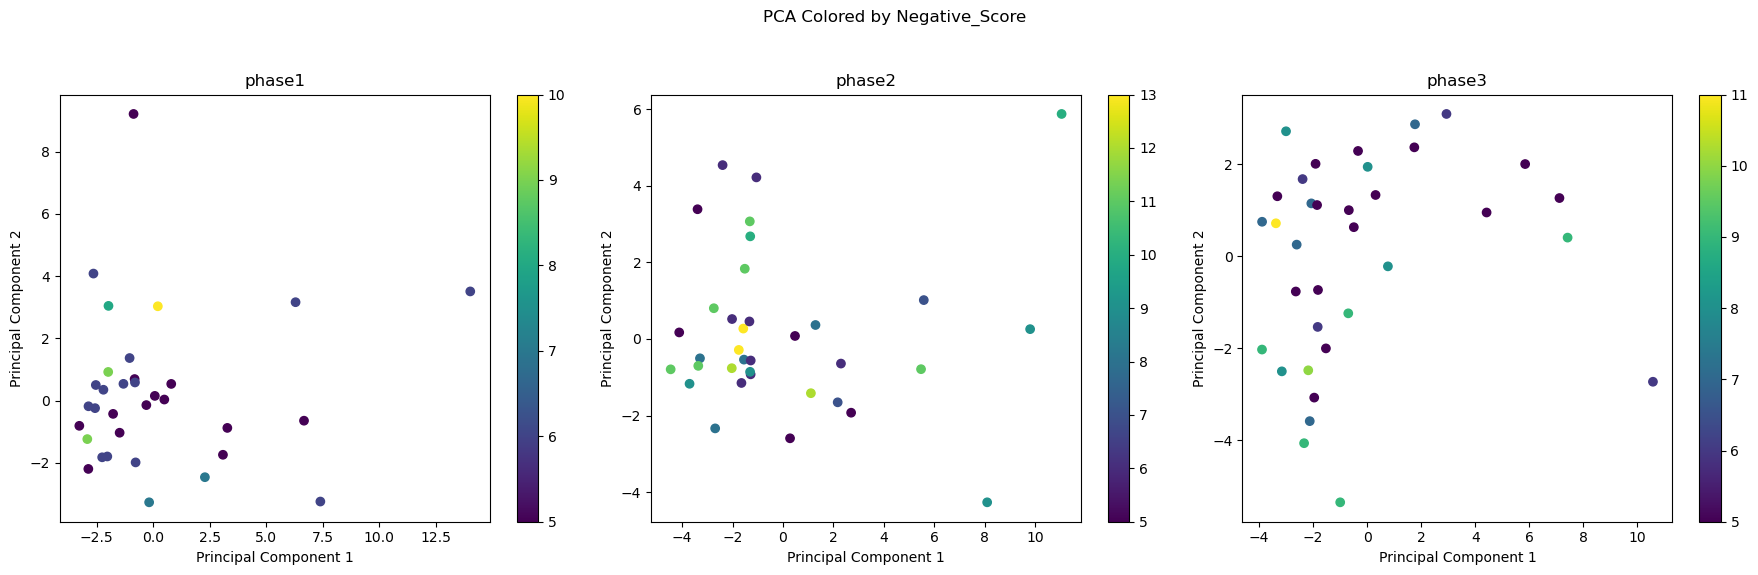

C:\Users\oscar\AppData\Local\Temp\ipykernel_2224\3689279745.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_data[score] = phase_data[negative_emotions if score == 'Negative_Score' else positive_emotions].sum(axis=1)
C:\Users\oscar\AppData\Local\Temp\ipykernel_2224\3689279745.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_data[score] = phase_data[negative_emotions if score == 'Negative_Score' else positive_emotions].sum(axis=1)
C:\Users\oscar\AppData\Local\Temp\ipykernel_2224\368927974

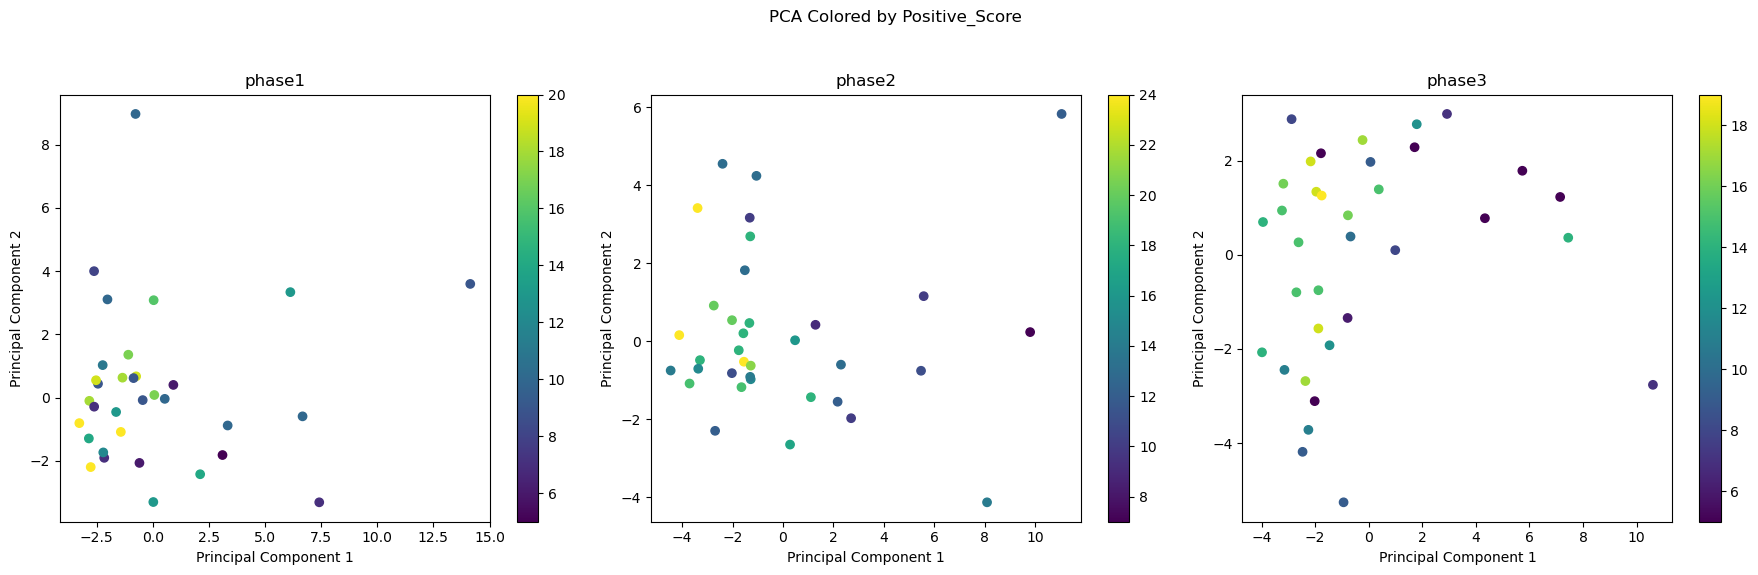

In [67]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()

# Define the emotional groups
negative_emotions = ['afraid', 'ashamed', 'hostile', 'nervous', 'upset', 'Frustrated']
positive_emotions = ['active', 'alert', 'attentive', 'determined', 'inspired']

# Phases
phases = sorted(data['Phase'].unique())  # Ensure phases are sorted or ordered as needed

# Columns to exclude from PCA include all individual emotion ratings
exclude_columns = [
    'Unnamed: 0', 'Round', 'Cohort', 'Puzzler', 'Individual'
] + negative_emotions + positive_emotions

# Iterate over each emotion score type
emotion_scores = ['Negative_Score', 'Positive_Score']
for score in emotion_scores:
    plt.figure(figsize=(18, 6))  # Wider figure to accommodate subplots

    # Calculate and plot for each phase
    for i, phase in enumerate(phases):
        phase_data = data[data['Phase'] == phase]

        # Sum of scores for the emotion group
        phase_data[score] = phase_data[negative_emotions if score == 'Negative_Score' else positive_emotions].sum(axis=1)

        # Select features excluding the specified columns
        features = phase_data.drop(exclude_columns + ['Phase'], axis=1)

        # Standardize the remaining features
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        # Apply PCA
        pca = PCA(n_components=2)  # Adjust based on your analysis
        principal_components = pca.fit_transform(features_scaled)

        # Create DataFrame for plotting
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df[score] = phase_data[score]

        # Subplot for each phase
        ax = plt.subplot(1, len(phases), i + 1)
        scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df[score], cmap='viridis', label=f'{score} in {phase}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_title(f'{phase}')
        plt.colorbar(scatter)

    plt.suptitle(f'PCA Colored by {score}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit super title
    plt.show()

During phase 2 it seems like a low PCA1 value indicates more positive emotions. We could investigate which features (their weights) that are most influenced on this. Hence, while being in a demanding/stress situation (solving the puzzle) which features are supporting a positive experience?

Correlation coefficient between PCA1 and Positive Score in Phase 2: nan
Correlation coefficient between PCA2 and Positive Score in Phase 2: nan


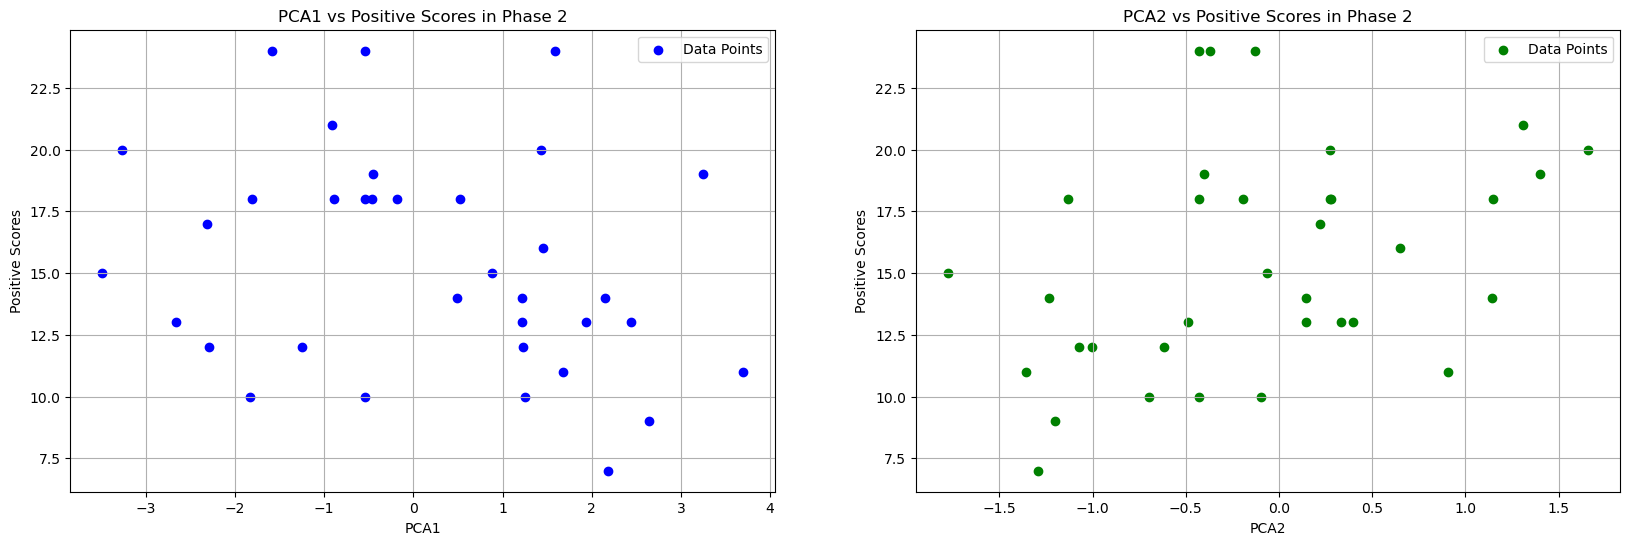

In [72]:
# Load and prepare your data
data = pd.read_csv('HR_data.csv')
data.dropna(inplace=True)

# Calculate the sum of scores for positive emotions and add it to 'data'
positive_emotions = ['active', 'alert', 'attentive', 'determined', 'inspired']
data['Positive_Score'] = data[positive_emotions].sum(axis=1)

# Isolate Phase 2 data
phase_2_data = data[data['Phase'] == 'phase2']  # Adjust the phase name as needed

# Assuming PCA is applied and we have the PCA values in a DataFrame
scaler = StandardScaler()
features = phase_2_data[positive_emotions]  # Assuming these are the features used for PCA
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)  # Let's keep it to 2 for simplicity, but you can increase this number
pca_results = pca.fit_transform(features_scaled)
phase_2_pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])
phase_2_pca_df['Positive_Score'] = phase_2_data['Positive_Score']

# Calculate and print the correlation coefficient for PCA1 and PCA2
correlation_pc1 = np.corrcoef(phase_2_pca_df['PC1'], phase_2_pca_df['Positive_Score'])[0, 1]
correlation_pc2 = np.corrcoef(phase_2_pca_df['PC2'], phase_2_pca_df['Positive_Score'])[0, 1]

# Plotting for visual confirmation for PCA1 and PCA2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Scatter plot for PCA1
ax1.scatter(phase_2_pca_df['PC1'], phase_2_pca_df['Positive_Score'], c='blue', label='Data Points')
ax1.set_title('PCA1 vs Positive Scores in Phase 2')
ax1.set_xlabel('PCA1')
ax1.set_ylabel('Positive Scores')
ax1.grid(True)
ax1.legend()

# Scatter plot for PCA2
ax2.scatter(phase_2_pca_df['PC2'], phase_2_pca_df['Positive_Score'], c='green', label='Data Points')
ax2.set_title('PCA2 vs Positive Scores in Phase 2')
ax2.set_xlabel('PCA2')
ax2.set_ylabel('Positive Scores')
ax2.grid(True)
ax2.legend()

plt.show()


No correlation to be found...

if we find something in the data then we should investigate component loadings such that we can answer questions like which measurements lead to this specific emotion etc.

In [4]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()

# Columns to exclude from PCA
exclude_columns = [
    'Unnamed: 0', 'Round', 'Phase', 'Cohort', 'Puzzler', 'Individual'
]

# Columns that are emotional states
emotions = [
    'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 
    'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined'
]

# Select features excluding the specified columns and emotional states
features = data.drop(exclude_columns, axis=1)

# Standardize the remaining features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Adjust based on your analysis
principal_components = pca.fit_transform(features_scaled)

# Iterate over each emotion to create a PCA plot
for emotion in emotions:
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df[emotion] = data[emotion]  # Add emotion for coloring in the plot

    # Plotting PCA results color-coded by emotion
    plt.figure(figsize=(6, 4),dpi=120)
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df[emotion], cmap='viridis', label=emotion)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(f'PCA Colored by {emotion}')
    plt.colorbar(scatter)
    plt.grid(True)

    # Adjust layout and margins
    plt.tight_layout(pad=1.0)  # Automatically adjust subplot parameters to give specified padding
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Fine-tune manually if needed

    # Save the figure
    plt.savefig(f'PCA_Colored_by_{emotion}.png', format='png', dpi=120, bbox_inches='tight', pad_inches=0.1)
    plt.close()  # Close the figure to free up memory

In [5]:
# Load the data
data = pd.read_csv('HR_data.csv')
data = data.dropna()

# Columns to exclude from PCA
exclude_columns = [
    'Unnamed: 0', 'Round', 'Phase', 'Cohort', 'Puzzler', 'Individual'
]

# Columns that are emotional states
emotions = [
    'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 
    'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined'
]

# Select features excluding the specified columns and emotional states
features = data.drop(exclude_columns, axis=1)

# Standardize the remaining features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()  # Adjust based on your analysis
principal_components = pca.fit_transform(features_scaled)



# Plotting the explained variance
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained')
plt.grid(True)
plt.savefig('varianceexplained.png', format='png', dpi=120, bbox_inches='tight', pad_inches=0.1)
plt.close()  # Close the figure to free up memory

In [6]:
(pca.explained_variance_ratio_[:3]*100)

array([23.22395372,  9.15294788,  6.84307815])